# TP Deep Learning - Part 1


Installations

In [1]:
# Pour faire les installations des différents modules
# pip install nom_package

Packages

In [1]:
# Pour les calculs et opérations numériques
import numpy as np

# Pour gérer efficacement les tableaux de données
import pandas as pd

# Pour la représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Pour découper en données de train et de test
from sklearn.model_selection import train_test_split

# Pour gérer les collections, les comptages dans un array
from collections import Counter

# Pour labéliser et normaliser et standardiser les données
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [3]:

# Pour les réseaux de neurones
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

2023-12-05 14:43:15.265362: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 14:43:15.604754: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 14:43:17.144325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 14:43:17.144421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 14:43:17.440401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:



# Metrics d'évaluations du modèle
from sklearn.metrics import matthews_corrcoef, accuracy_score, classification_report, confusion_matrix 

Exercice 1 (Perceptron simple)

1. Charger les données spam sur Moodle

In [5]:
# Données Spam
df = pd.read_csv('spam7.csv', sep=';')
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [6]:
# Informations sur les data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crl.tot  4601 non-null   int64  
 1   dollar   4601 non-null   float64
 2   bang     4601 non-null   float64
 3   money    4601 non-null   float64
 4   n000     4601 non-null   float64
 5   make     4601 non-null   float64
 6   yesno    4601 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 251.7+ KB


2. Fabriquer un échantillon d’entrainement et un échantillon test.

In [7]:
# On découpe en X et Y
X = df.iloc[:,0:6]
Y = df.iloc[:,6]
Y

0       y
1       y
2       y
3       y
4       y
       ..
4596    n
4597    n
4598    n
4599    n
4600    n
Name: yesno, Length: 4601, dtype: object

In [8]:
# Encodage de la sortie Y qu'on va chercher à classifier
labEncr_Y = LabelEncoder()
Y = labEncr_Y.fit_transform(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
# Feature scaling - minmaxscaler - normalisation pour que les entrées soient à la meme echelle.
# De plus on a testé sans normaliser et la classification était moins bonne

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Feature scaling - standardisation
# StdSc = StandardScaler().fit(X)
# X = StdSc.transform(X)

In [11]:
# On découpe en échantillons d'entrainement et de test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2300, 6) (2301, 6) (2300,) (2301,)


In [12]:
np.sum(Y_test==1)

919

Counter({0: 1406, 1: 894})


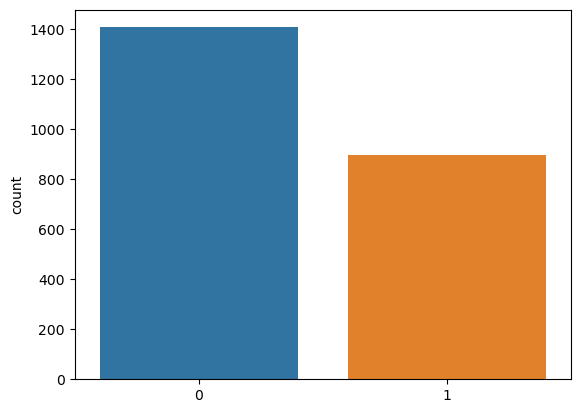

In [13]:
# Comportment de la variable à prédire
counter = Counter(Y_train)
print(counter)
distribution = sns.countplot(x = Y_train)
plt.show()

3. Construire un modèle de type 'perceptron simple' en utilisant en fonction d'activation la fonction sigmoïde.

In [18]:
# Initialisation 
classifier = Sequential()
# Ajout de la couche cachée
classifier.add(Dense(units = 20, input_dim = 6,activation="relu"))
# Ajout de la couche Dropout de régularisation
#classifier.add(Dropout(0.5))
# Ajout de la couche de sortie
classifier.add(Dense(units = 1, activation = 'sigmoid'))

4. Que signifient les différents paramètres du modèle ? Affichez les caractéristiques de ce modèle.

###### Paramètres du modèle

- units : nombre de neurones par couche (layers) à ajuster

- input_dim : la taille des features en entrée

- Dense : permet de créer les différentes couches du réseau de neurone

###### Paramètres de compilation du modèle

- loss :  estime l’erreur actuelle dans le réseau

- optimizer : met à jour les poids du réseau de manière itérative

###### Paramètres d'entrainement du modèle

- batch_size : contrôle le nombre d'observations à traiter avant la mise à jour des paramètres internes du modèle

- epochs : contrôle le nombre de passages complets à travers l'ensemble de données d'apprentissage

In [19]:
# Aperçu du modèle
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                140       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5. Entraînez le modèle sur l’échantillon d’entraînement (comprendre les paramètres epochs, batch_size, optimizer).

In [24]:
# Compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting + entrainnement
history = classifier.fit(X_train, Y_train, batch_size = 20, epochs = 100)

Epoch 1/100
115/115 [==============================] - 0s 609us/step - loss: 0.3607 - accuracy: 0.8600
Epoch 2/100
115/115 [==============================] - 0s 534us/step - loss: 0.3592 - accuracy: 0.8630
Epoch 3/100
115/115 [==============================] - 0s 533us/step - loss: 0.3593 - accuracy: 0.8591
Epoch 4/100
115/115 [==============================] - 0s 543us/step - loss: 0.3592 - accuracy: 0.8613
Epoch 5/100
115/115 [==============================] - 0s 523us/step - loss: 0.3580 - accuracy: 0.8600
Epoch 6/100
115/115 [==============================] - 0s 528us/step - loss: 0.3576 - accuracy: 0.8609
Epoch 7/100
115/115 [==============================] - 0s 535us/step - loss: 0.3569 - accuracy: 0.8604
Epoch 8/100
115/115 [==============================] - 0s 520us/step - loss: 0.3560 - accuracy: 0.8617
Epoch 9/100
115/115 [==============================] - 0s 519us/step - loss: 0.3563 - accuracy: 0.8639
Epoch 10/100
115/115 [==============================] - 0s 516us/step - l

115/115 [==============================] - 0s 503us/step - loss: 0.3383 - accuracy: 0.8674
Epoch 80/100
115/115 [==============================] - 0s 539us/step - loss: 0.3373 - accuracy: 0.8665
Epoch 81/100
115/115 [==============================] - 0s 496us/step - loss: 0.3371 - accuracy: 0.8683
Epoch 82/100
115/115 [==============================] - 0s 492us/step - loss: 0.3367 - accuracy: 0.8652
Epoch 83/100
115/115 [==============================] - 0s 496us/step - loss: 0.3375 - accuracy: 0.8674
Epoch 84/100
115/115 [==============================] - 0s 497us/step - loss: 0.3372 - accuracy: 0.8657
Epoch 85/100
115/115 [==============================] - 0s 499us/step - loss: 0.3367 - accuracy: 0.8661
Epoch 86/100
115/115 [==============================] - 0s 503us/step - loss: 0.3364 - accuracy: 0.8661
Epoch 87/100
115/115 [==============================] - 0s 526us/step - loss: 0.3364 - accuracy: 0.8670
Epoch 88/100
115/115 [==============================] - 0s 545us/step - loss:

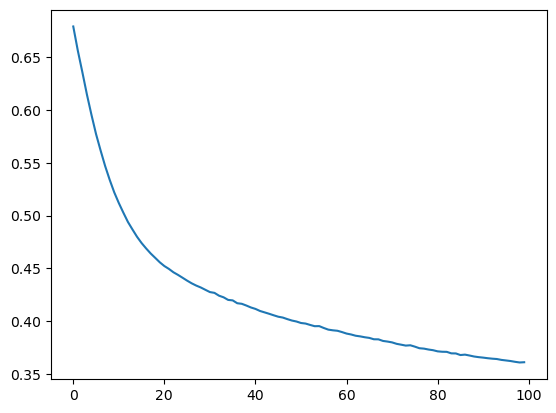

In [22]:
# Affichage de la fonction de perte le long des 100 epochs
plt.plot(history.history['loss'])

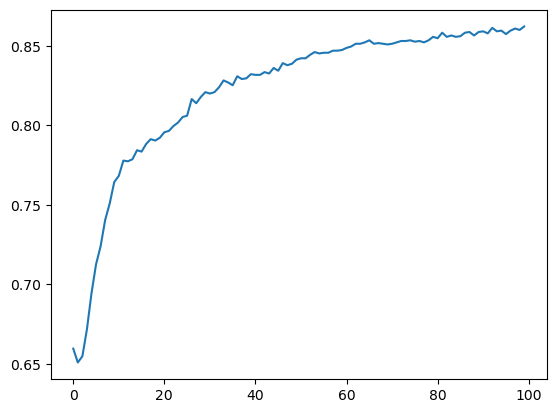

In [23]:
# Affichage l'accuracy le long des 100 epochs
plt.plot(history.history['accuracy'])

6. Calculez l’erreur test.

In [26]:
score=classifier.evaluate(X_test,Y_test)

72/72 [==============================] - 0s 654us/step - loss: 0.3509 - accuracy: 0.8540


In [27]:
# Prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

72/72 [==============================] - 0s 482us/step


2301
Counter({0: 1382, 1: 919})


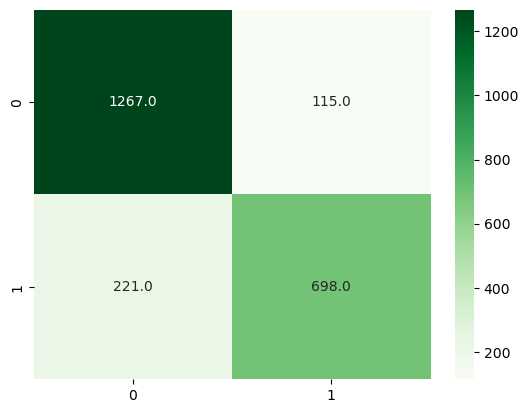

In [28]:
mc = confusion_matrix(Y_test, y_pred)
print(np.sum(mc))
sns.heatmap(mc, annot = True, cmap="Greens", fmt = '.1f')
counter = Counter(Y_test)
print(counter)

In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
metrics.auc(fpr, tpr)

0.8381542417747851

In [31]:
# Erreur à partir des données de test
acc = accuracy_score(Y_test, y_pred)
err = np.round(1 - acc, 2)
print("Erreur de classification: %.2f" % (err))

Erreur de classification: 0.15


In [34]:
## Pistes pour compléter
## Pour comparer l'évolution,des erreurs tests et validation
## utiliser learning_curve
